In [ ]:
pip install wheel

In [ ]:
pip install pandas

## Gathering reference traces

In [36]:
import numpy as np
import pickle
N = 200*30

all_labels = [] 
trace_list = []

for i in range(0, 30):
         
    file_path = f"trainingtraces/attacktrace_{i}.pkl"    
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in).transpose()
        trace_list.append(trace)
        
        for j in range(200):
            all_labels.append(i) 
        
all_traces = np.vstack(trace_list)
 

In [18]:
all_labels

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


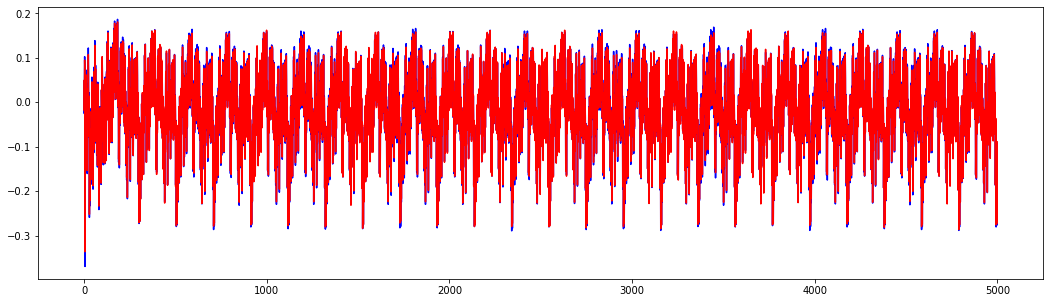

In [9]:
# Plot the traces
import matplotlib.pyplot as plt


plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(all_traces[10], color = 'blue')# Not a specific slice, this is just an exampleto plot the trace
plt.plot(all_traces[120], color = 'red') 
plt.show()


## ML side-channel analysis

In [14]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(all_traces, all_labels, test_size=0.2)

from sklearn.neural_network import MLPClassifier 

Dec_clf = MLPClassifier(
    random_state=42,
    solver='adam', 
    learning_rate='adaptive',
    max_iter=3000,
    hidden_layer_sizes=[400],
    batch_size=500,
    alpha=0.0001, # set alpha for L2 regularization
    early_stopping=True,
    n_iter_no_change=1000,
    verbose=False, 
)


In [15]:
Dec_clf.fit(X_train, y_train)

MLPClassifier(batch_size=500, early_stopping=True, hidden_layer_sizes=[400],
              learning_rate='adaptive', max_iter=3000, n_iter_no_change=1000,
              random_state=42)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(all_traces, all_labels, test_size=0.2)

predictions =np.zeros(len(y_test))
predictions = Dec_clf.predict(X_test)
success = 0

for i in range(len(y_test)):
    if predictions[i] == y_test[i]: 
        success = success +1
    #else:
        #print(predictions[i], y_test[i])
 
         
print((success /len(y_test))*100)

99.91666666666667


In [14]:
predictions[0:10]

array([21,  4, 18, 15, 16, 11, 26, 22, 10, 21])

### Attack phase

In [55]:
M = 200*30

all_labels = [] 
trace_list = []

attack_traces = np.empty((M, 5000))  # create empty array to store concatenated traces
attack_labels = []#np.empty(M, dtype=int)  # create empty array to store concatenated labels

for i in range(0, 30):
        
    file_path = f"reftraces/200reftrace_first entry_{i}.pkl"
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in).transpose()
        for k in range(200):
            trace_list.append(trace[k])

        for j in range(200):
            attack_labels.append(i)
            
attack_traces = np.vstack(trace_list)

In [56]:
len(attack_labels)

6000

In [57]:
predictions = np.zeros(len(attack_traces))

predictions = Dec_clf.predict(attack_traces)

success = 0

for i in range(len(attack_labels)):
    if predictions[i] == attack_labels[i]: 
        success = success +1
    else:
        print(predictions[i], attack_labels[i])
 
         
print((success /len(attack_labels))*100)

2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
2 1
16 2
16 2
16 2
16 2
16 2
16 2
16 2
16 2
16 2
19 3
19 3
11 3
11 3
11 3
11 3
11 3
11 3
11 3
19 3
19 3
11 3
19 3
19 3
19 3
19 3
19 3
19 3
11 3
19 3
19 3
11 3
11 3
11 3
19 3
19 3
19 3
11 3
19 3
19 3
19 3
11 3
11 3
11 3
11 3
19 3
19 3
11 3
19 3
11 3
11 3
11 3
11 3
19 3
19 3
11 3
19 3
11 3
11 3
11 3
11 3
19 3
19 3
17 3
19 3
19 3
19 3
11 3
19 3
11 3
19 3
19 3
19 3
11 3
19 3
19 3
19 3
17 3
19 3
19 3
19 3
19 3
11 3
19 3
11 3
11 3
11 3
11 3
19 3
19 3
19 3
19 3
19 3
11 3
19 3
19 3
19 3
11 3
19 3
11 3
19 3
19 3
19 3
19 3
19 3
11 3
11 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
11 3
19 3
19 3
19 3
19 3
11 3
19 3
19 3
19 3
19 3
19 3
19 3
11 3
19 3
19 3
19 3
19 3
19 3
19 3
19 3
11 3
19 3
11 3
19 3
19 3
11 3
19 3
11 3
11 3
19 3
19 3
17 3
11 3
19 3
19 3
11 3
11 3
19 3
11 3
19 3
19 3
11 3
11 3
19 3
11 3
19 3
11 3
19 3
19 3
19 3
11 3
19 3
11 3
19 3
11 3
19 3


27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
27 15
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 17
19 1

## Trying tattack phase with diff data

In [59]:
attack2_traces = np.empty((15, 5000))  # create empty array to store concatenated traces
attack2_labels = np.empty(15, dtype=int)  # create empty array to store concatenated labels

for i in range(0, 15):
    
    file_path_labels = f"attacktraces/oilvector_{i}.pkl"
    with open(file_path_labels, "rb") as pickle_in_labels:
        label = pickle.load(pickle_in_labels) 
        #print(label)
        attack2_labels[i] = label[0]
        
    file_path = f"attacktraces/attacktrace_{i}.pkl"
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in).transpose()
        attack2_traces[i] = trace[0]



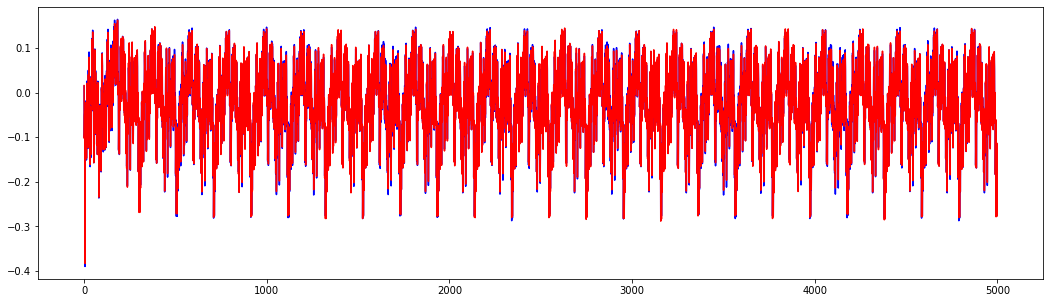

In [66]:
# Plot the traces
import matplotlib.pyplot as plt


plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(attack2_traces[0], color = 'blue')# Not a specific slice, this is just an exampleto plot the trace
plt.plot(attack2_traces[1], color = 'red') 
plt.show()



In [61]:
predictions2= Dec_clf.predict(attack2_traces)

In [62]:
predictions2

array([14,  8, 27, 27, 15, 14, 14, 27, 15, 27, 15, 27, 15, 14, 12])

In [ ]:
# Plot the traces
import matplotlib.pyplot as plt


plt.figsize=(6,7)
plt.gcf().set_size_inches(18, 5) 
plt.plot(attack_traces[0], color = 'blue')# Not a specific slice, this is just an exampleto plot the trace
plt.plot(attack_traces[1], color = 'red') 
plt.show()

In [ ]:
predictions= Dec_clf.predict(attack_traces)


In [ ]:
predictions

In [ ]:
predictions = Dec_clf.predict(attack_traces)
success = 0
for i in range(29):
    if predictions[i] == attack_labels[i]: 
        success = success +1
        print("Correct:", predictions[i], attack_labels[i])
    else:
        print("Wrong:", predictions[i], attack_labels[i])
 
         
print((success /len(attack_traces))*100)

In [ ]:
10000/10

1000*2.5

In [ ]:
1000 * 2.5

In [23]:
import numpy as np
import pickle
N = 200*30

all_attack_labels = np.empty(N, dtype=int)  # create empty array to store concatenated labels
labels_list = []
trace_list = []

for i in range(0, 30):
         
    file_path = f"trainingtraces/attacktrace_{i}.pkl"    
    with open(file_path, "rb") as pickle_in:
        trace = pickle.load(pickle_in).transpose()
        trace_list.append(trace)
        
        for j in range(200):
            label[j] = i
 